# DSC540 Project 3

DePaul University  
Ilyas Ustun, PhD  
Chicago, IL  

## Rules
- Write your code under the corresponding questions. You are encouraged to use more than one cell.
- Provide explanation in a separate Markdown formatted cell. 
- You can change the cell type by:
    - Click on the outer area of the cell type you want to change,
    - Go to the top, and select either Code or Markdown from the dropdown menu.
- Be concise in your explanations and conclusions.
- Write clear code and provide explanation to functions you create by using `#` comment sign.
- Try to answer the questions by yourself. Use documentation from pandas, sklearn and similar libraries to solve the problem.
- If you are stuck you can use different resources. Do not find an identical project and copy paste the solutions. 
- Write your name at the beginning of the jupyter notebook.


Important:  
- **Do NOT share the solutions with other people.**
- **Do NOT share the solutions on the internet including but not limited to Github and other platforms.**
- Sign the Honor Pledge below indicating that you have agreed to these rules listed here, and any other ethical and honor rules as required by the university.



- **Deliverables:**
    1. The Python Jupyter notebook file named properly with your name. Example: dsc540_project1_john_doe.ipynb
    2. The HTML output of this code notebook names the same way. Example: dsc540_project1_john_doe.html
        - File -> Download as -> HTML  
        
        
**DO NOT zip the files.**

Good Luck!

### Keiland Pullen

**Honor Pledge:**  
I pledge on my honor that I, **Keiland Pullen**, have followed the rules listed above, that I have not given or received any unauthorized assistance on this assignment. 



## Project Description

In this project we will be analyzing CO and NOX gas emissions from a power plant. The variables, their meanings and some statistics are given in the table below.

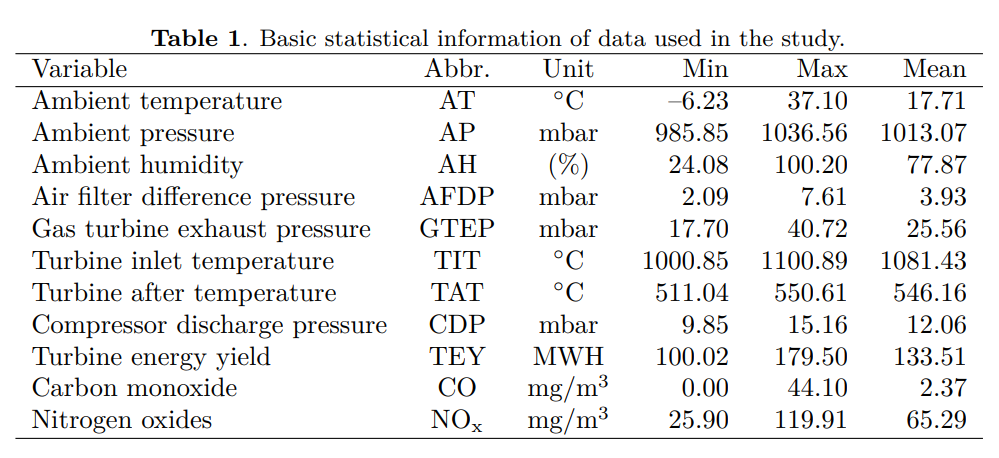![PowerPlantEmissionsFeaturesTable](PowerPlantEmissionsFeaturesTable.PNG)

## Import Libraries

**Import the usual libraries for pandas and plotting, and sklearn.**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics

In [3]:
import sklearn
sklearn.__version__

'0.24.2'

In [4]:
pd.set_option('display.max_columns', 100)
RANDOM_STATE = 0

### These are the packages I used

In [5]:
# Your package imports here

> NOTE: For the Kernel RBF SVM hyper parameter tuning use these parameters in the questions:
        
        'C': [1, 10, 100, 1000]
        'gamma': [0.001, 0.01, 0.1, 1]

## Q1 [10]
- Read in the dataset
- How many rows and variables are there?


#### Get the Data

**Use pandas to read in the datasets as a dataframe.**

In [6]:
pwd

'C:\\Users\\Home'

In [7]:
df = pd.read_csv('/Users/Home/Desktop/DePaul/Winter - DSC - 540 - Advanced Machine Learning/Week 7/Homework/gas_emissions.csv')

In [8]:
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,1.95320,1020.1,84.985,2.5304,20.116,1048.7,544.92,116.27,10.799,7.4491,113.250
1,1.21910,1020.1,87.523,2.3937,18.584,1045.5,548.50,109.18,10.347,6.4684,112.020
2,0.94915,1022.2,78.335,2.7789,22.264,1068.8,549.95,125.88,11.256,3.6335,88.147
3,1.00750,1021.7,76.942,2.8170,23.358,1075.2,549.63,132.21,11.702,3.1972,87.078
4,1.28580,1021.6,76.732,2.8377,23.483,1076.2,549.68,133.58,11.737,2.3833,82.515


#### Is there any missing data?

In [9]:
# Check for any missing values in data frame 
df.isnull()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
7379,False,False,False,False,False,False,False,False,False,False,False
7380,False,False,False,False,False,False,False,False,False,False,False
7381,False,False,False,False,False,False,False,False,False,False,False
7382,False,False,False,False,False,False,False,False,False,False,False


In [10]:
#Check for any missing values in any columns
df.isna().any()


AT      False
AP      False
AH      False
AFDP    False
GTEP    False
TIT     False
TAT     False
TEY     False
CDP     False
CO      False
NOX     False
dtype: bool

In [11]:
# Get count of any missing values in column (or data frame)
# df1.isnull().sum().sum()

df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

#### What is the average value of AP for those points who have CO levels above 3 $mg/m^3$?

In [12]:

ans1 = df[df['CO'] > 3].groupby('CO').AP.mean()
         
ans1.mean()

1015.6816853391157

#### Create a correlation map between the variables. Which variables have high correlation (> |0.9|)?

<AxesSubplot:>

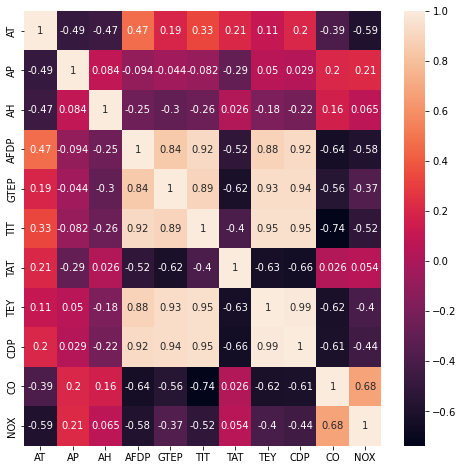

In [13]:
matrix1 = df.corr()
matrix1
plt.figure(figsize = (8,8))
sns.heatmap(matrix1, annot=True) 

In [14]:
matrix1

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,-0.493098,-0.466288,0.468976,0.193578,0.330112,0.208277,0.109437,0.200909,-0.390647,-0.593580
AP,-0.493098,1.000000,0.084381,-0.094144,-0.043730,-0.081605,-0.290147,0.050326,0.029420,0.200945,0.214236
AH,-0.466288,0.084381,1.000000,-0.245456,-0.297708,-0.260683,0.026251,-0.182732,-0.221706,0.158999,0.065351
AFDP,0.468976,-0.094144,-0.245456,1.000000,0.843958,0.915128,-0.519807,0.884954,0.922991,-0.640789,-0.584452
GTEP,0.193578,-0.043730,-0.297708,0.843958,1.000000,0.892851,-0.620652,0.932337,0.938142,-0.557177,-0.366655
TIT,0.330112,-0.081605,-0.260683,0.915128,0.892851,1.000000,-0.396161,0.951813,0.951590,-0.738092,-0.520081
TAT,0.208277,-0.290147,0.026251,-0.519807,-0.620652,-0.396161,1.000000,-0.633933,-0.656613,0.025768,0.054455
TEY,0.109437,0.050326,-0.182732,0.884954,0.932337,0.951813,-0.633933,1.000000,0.991207,-0.616791,-0.403278
CDP,0.200909,0.029420,-0.221706,0.922991,0.938142,0.951590,-0.656613,0.991207,1.000000,-0.612653,-0.443093
CO,-0.390647,0.200945,0.158999,-0.640789,-0.557177,-0.738092,0.025768,-0.616791,-0.612653,1.000000,0.678394


The following variales have correlation values higher than 0.9:

- CDP vs AFDP
- TIT vs AFDP
- CDP vs GTEP
- TEY vs GTEP
- TEY vs TIT
- CDP vs TIT
- CDP vs TEY

#### Create a scatter plot of 'TEY' vs 'CDP'

C:\Users\Home\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CDP', ylabel='TEY'>

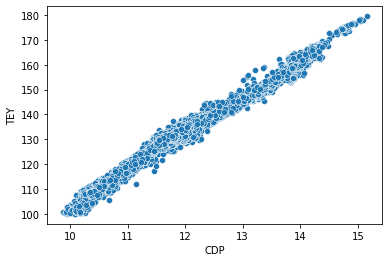

In [15]:
#plt.figure(figsize = (15,15))
# df.plot(x="CDP", y="TEY", kind="scatter", s=5) # Attempt to adjust size of plot dots
#df.plot(x="CDP", y="TEY", kind="scatter")

# Used Seaborn to allow each point to be distiguishable
sns.scatterplot(df['CDP'], df['TEY'])

#### Create histograms for CO and NOX.

<AxesSubplot:xlabel='CO', ylabel='Count'>

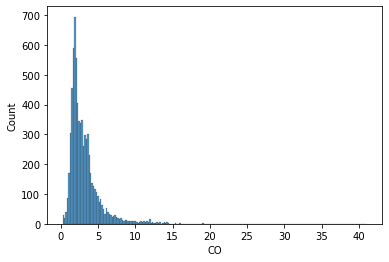

In [16]:
sns.histplot(data=df, x='CO')
#df["CO"].plot(kind="hist")

<AxesSubplot:xlabel='NOX', ylabel='Count'>

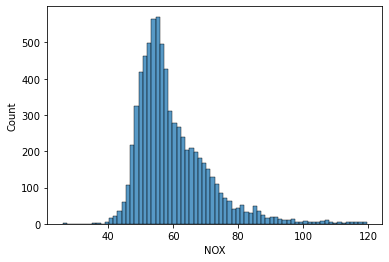

In [17]:
sns.histplot(data=df, x='NOX')
#df["NOX"].plot(kind="hist")

#### Create a sctter plot of CO vs NOX.

C:\Users\Home\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NOX', ylabel='CO'>

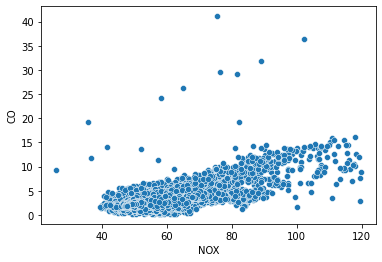

In [18]:
sns.scatterplot(df['NOX'], df['CO'])

### Prepare data for machine learning

- We will predict CO using all the other variables.
- NOX, which is another emission gas, will not be used as predictor.
- CO is a continuous variable, thus we will be doing regression.
- Many of algorithms that do classification also have regression counterparts.

In [19]:
y = df.CO
X = df.drop(['CO', 'NOX'], axis=1)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=RANDOM_STATE)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=RANDOM_STATE)

In [21]:
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,1.95320,1020.1,84.985,2.5304,20.116,1048.7,544.92,116.27,10.799,7.4491,113.250
1,1.21910,1020.1,87.523,2.3937,18.584,1045.5,548.50,109.18,10.347,6.4684,112.020
2,0.94915,1022.2,78.335,2.7789,22.264,1068.8,549.95,125.88,11.256,3.6335,88.147
3,1.00750,1021.7,76.942,2.8170,23.358,1075.2,549.63,132.21,11.702,3.1972,87.078
4,1.28580,1021.6,76.732,2.8377,23.483,1076.2,549.68,133.58,11.737,2.3833,82.515
...,...,...,...,...,...,...,...,...,...,...,...
7379,3.62680,1028.5,93.200,3.1661,19.087,1037.0,541.59,109.08,10.411,10.9930,89.172
7380,4.16740,1028.6,94.036,3.1923,19.016,1037.6,542.28,108.79,10.344,11.1440,88.849
7381,5.48200,1028.5,95.219,3.3128,18.857,1038.0,543.48,107.81,10.462,11.4140,96.147
7382,5.88370,1028.7,94.200,3.9831,23.563,1076.9,550.11,131.41,11.771,3.3134,64.738


In [28]:
# Standardization of the data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_val = ss.transform(X_val)
X_test = ss.transform(X_test)

In [29]:
X_train.shape

(5316, 9)

In [30]:
X_val.shape

(1329, 9)

In [31]:
X_test.shape

(739, 9)

## Utility Functions

You can create helper functions.
For example, create functions that take the score and store it in a dataframe for a specific model.

## Q2 [10]

- Apply Linear Regression. Predict CO emission using other variables.
    - What is the model $R^2$ on training data?
    - What is the $R^2$ on validation data?
    - What is the Root Mean Squared Error (RMSE) on training data?
    - What is the RMSE on validation data?
    
> - $R^2$ higher is better. ($R^2$ is % variation in data being explained)  
> - RMSE lower is better. (RMSE (Root Mean Squared Error) is error, meaning the difference between predictions and actual data)  

Hint:  
- You can use the `r2_score` and `mean_squared_error` methods in `sklearn.metrics`.   
- You need to take the square root of Mean Squared Error to get to RMSE. (MSE $\rightarrow$ square root $\rightarrow$ RMSE)

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

LinearRegression()

In [34]:
y_pred = lin_reg.predict(X_test)

In [35]:
y_pred_2 = lin_reg.predict(X_val)

In [36]:
print("The score of the model using training data is: ", lin_reg.score(X_train, y_train))

The score of the model using training data is:  0.6640090820784397


In [37]:
print("The score of the model using the validation data is: ", lin_reg.score(X_val, y_val))

The score of the model using the validation data is:  0.646343190818214


In [38]:
from sklearn.metrics import r2_score, mean_squared_error

train_R2 = r2_score(y_test, y_pred)

print("The R2 score for the training data is: ", train_R2)

The R2 score for the training data is:  0.49335535486605153


In [39]:
val_R2 = r2_score(y_val, y_pred_2)

print("The R2 score for the validation data is: ", val_R2)

The R2 score for the validation data is:  0.646343190818214


In [40]:
train_RMSE = mean_squared_error(y_test, y_pred, squared=False)

print("The RMSE on the training data is: ", train_RMSE)

The RMSE on the training data is:  1.6611828303619114


In [41]:
val_RMSE = mean_squared_error(y_val, y_pred_2, squared=False)

print("The RMSE on the validation data is: ", val_RMSE)

The RMSE on the validation data is:  1.3884894690085987


## Q3 [10]

- Apply Random Forest Regression with 100 trees. Predict CO emission using other variables.
    - What is the model $R^2$?
    - What is the $R^2$ on validation data?
    - What is the RMSE on training data?
    - What is the RMSE on validation data?

- Is training and validation score close? If not what might be the problem?
- If there is a large gap, try to decrease the gap by changing some hyperparameters of the Random Forest model. (In this analysis, any difference more than 0.10 $R^2$ difference can be assumed to be large.)
    - Once you reach a difference of less than or close to 0.10 between training $R^2$ and validation $R^2$ you can stop. 
    - During this process your training score will probably decrease, and that is OK. 

In [42]:
from sklearn.ensemble import RandomForestRegressor

In [43]:
estimator = RandomForestRegressor(n_estimators=100, random_state=RANDOM_STATE, max_depth=100, min_samples_split=10, max_features="auto", min_samples_leaf=5 ,max_leaf_nodes=10)

In [44]:
estimator.fit(X_train, y_train)

RandomForestRegressor(max_depth=100, max_leaf_nodes=10, min_samples_leaf=5,
                      min_samples_split=10, random_state=0)

In [45]:
rf_pred_train = estimator.predict(X_test)

In [46]:
rf_pred_val = estimator.predict(X_val)

In [47]:
print("The score of the model using training data is: ", estimator.score(X_train, y_train))

The score of the model using training data is:  0.7680269471461654


In [48]:
print("The score of the model using the validation data is: ", estimator.score(X_val, y_val))

The score of the model using the validation data is:  0.7284398798712164


In [49]:
rf_train_R2 = r2_score(y_test, rf_pred_train)

print("The R2 score for the training data is: ", rf_train_R2)

The R2 score for the training data is:  0.5569608498618781


In [50]:
rf_val_R2 = r2_score(y_val, rf_pred_val)

print("The R2 score for the validation data is: ", rf_val_R2)

The R2 score for the validation data is:  0.7284398798712164


In [51]:
rf_train_RMSE = mean_squared_error(y_test, rf_pred_train, squared=False)

print("The RMSE on the training data is: ", rf_train_RMSE)

The RMSE on the training data is:  1.5534123655490768


In [52]:
rf_val_RMSE = mean_squared_error(y_val, rf_pred_val, squared=False)

print("The RMSE on the validation data is: ", rf_val_RMSE)

The RMSE on the validation data is:  1.2167029866757624


In the first execution of the Random Forest regression, the scored for Training and Validation were far apart:
* Initial R2 Traing score = 0.5332905801735248
* Initial R2 Validation score = 0.7557749162315548

In [53]:
estimator.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 100,
 'max_features': 'auto',
 'max_leaf_nodes': 10,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

For this problem, I executed the tasks with a number of combinations of hyper parameters and was unable to decrease the R2 margins between the Training and Validation sets.

## Q4 [10]

- Apply Support Vector Regression. Predict CO emission using other variables.
    - What is the model $R^2$?
    - What is the $R^2$ on validation data?
    - What is the RMSE on training data?
    - What is the RMSE on validation data?
    
- Do this for each of the models listed below using the default parameters:  
    1. **Linear kernel SVR**  
    2. **Polynomial kernel SVR**  
    3. **RBF kernel SVR** 

In [54]:
from sklearn.svm import SVR

### Linear SVM Regressor

In [55]:
L_estimator = SVR(kernel='linear')
L_estimator

SVR(kernel='linear')

In [56]:
L_estimator.fit(X_train, y_train)

SVR(kernel='linear')

In [57]:
Lest_pred_train = L_estimator.predict(X_test)

In [58]:
Lest_pred_val = L_estimator.predict(X_val)

In [59]:
print("The score of the model using training data is: ", L_estimator.score(X_train, y_train))

The score of the model using training data is:  0.6244412583337272


In [60]:
print("The score of the model using the validation data is: ", L_estimator.score(X_val, y_val))

The score of the model using the validation data is:  0.6021771925365862


In [61]:
Lest_train_R2 = r2_score(y_test, Lest_pred_train)

print("The R2 score for the training data is: ", Lest_train_R2)

The R2 score for the training data is:  0.4779675493545852


In [62]:
Lest_val_R2 = r2_score(y_val, Lest_pred_val)

print("The R2 score for the validation data is: ", Lest_val_R2)

The R2 score for the validation data is:  0.6021771925365862


In [63]:
Lest_train_RMSE = mean_squared_error(y_test, Lest_pred_train, squared=False)

print("The RMSE on the training data is: ", Lest_train_RMSE)

The RMSE on the training data is:  1.6862208519504485


In [64]:
Lest_val_RMSE = mean_squared_error(y_val, Lest_pred_val, squared=False)

print("The RMSE on the validation data is: ", Lest_val_RMSE)

The RMSE on the validation data is:  1.4726394044713864


### Polynomial Kernel SVM Regressor

In [65]:
from sklearn.svm import SVR
P_estimator = SVR(kernel='poly')
P_estimator

SVR(kernel='poly')

In [66]:
P_estimator.fit(X_train, y_train)

SVR(kernel='poly')

In [67]:
P_pred_train = P_estimator.predict(X_test)

In [68]:
P_pred_val = P_estimator.predict(X_val)

In [69]:
print("The score of the model using training data is: ", P_estimator.score(X_train, y_train))

The score of the model using training data is:  0.7404852376508414


In [70]:
print("The score of the model using the validation data is: ", P_estimator.score(X_val, y_val))

The score of the model using the validation data is:  0.7310487212257811


In [71]:
Pest_train_R2 = r2_score(y_test, P_pred_train)

print("The R2 score for the training data is: ", Pest_train_R2)

The R2 score for the training data is:  0.5105320772237195


In [72]:
Pest_val_R2 = r2_score(y_val, P_pred_val)

print("The R2 score for the validation data is: ", Pest_val_R2)

The R2 score for the validation data is:  0.7310487212257811


In [73]:
Pest_train_RMSE = mean_squared_error(y_test, P_pred_train, squared=False)

print("The RMSE on the training data is: ", Pest_train_RMSE)

The RMSE on the training data is:  1.632780567840026


In [74]:
Pest_val_RMSE = mean_squared_error(y_val, P_pred_val, squared=False)

print("The RMSE on the validation data is: ", Pest_val_RMSE)

The RMSE on the validation data is:  1.210844531836506


### RBF Kernel SVM Regressor

In [75]:
from sklearn.svm import SVR
RBF_estimator = SVR(kernel='rbf')
RBF_estimator

SVR()

In [76]:
RBF_estimator.fit(X_train, y_train)

SVR()

In [77]:
RBF_pred_train = RBF_estimator.predict(X_test)

In [78]:
RBF_pred_val = RBF_estimator.predict(X_val)

In [79]:
print("The score of the model using training data is: ", RBF_estimator.score(X_train, y_train))

The score of the model using training data is:  0.7653225070588423


In [80]:
print("The score of the model using the validation data is: ", RBF_estimator.score(X_val, y_val))

The score of the model using the validation data is:  0.7476173201040639


In [81]:
RBF_train_R2 = r2_score(y_test, RBF_pred_train)

print("The R2 score for the training data is: ", RBF_train_R2)

The R2 score for the training data is:  0.5933703930098788


In [82]:
RBF_val_R2 = r2_score(y_val, RBF_pred_val)

print("The R2 score for the validation data is: ", RBF_val_R2)

The R2 score for the validation data is:  0.7476173201040639


In [83]:
RBF_train_RMSE = mean_squared_error(y_test, RBF_pred_train, squared=False)

print("The RMSE on the training data is: ", RBF_train_RMSE)

The RMSE on the training data is:  1.4882133759945957


In [84]:
RBF_val_RMSE = mean_squared_error(y_val, RBF_pred_val, squared=False)

print("The RMSE on the validation data is: ", RBF_val_RMSE)

The RMSE on the validation data is:  1.1729550025939743


### Q5 [10]

- Take RBF Kernel SVM and perform hyperparameter tuning. See if you can increase the $R^2$ score.   
    - Use:  
          'C': [1, 10, 100, 1000]
          'gamma': [0.001, 0.01, 0.1, 1]  

    - What is the model $R^2$?
    - What is the $R^2$ on validation data?
    - What is the RMSE on training data?
    - What is the RMSE on validation data?

In [85]:
from sklearn.model_selection import GridSearchCV

In [86]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{:.3f} (+/-{:.2f}) for {}'.format(round(mean, 3), round(std * 2, 3), params))


In [87]:
parameters = {
    'C': [1, 10, 100, 1000],
    'gamma': [0.001, 0.01, 0.1, 1]
}

svc = SVR(kernel='rbf')

RBF_cv = GridSearchCV(svc, parameters, cv=3, n_jobs=-1)
RBF_cv.fit(X_train, y_train.values.ravel())

print_results(RBF_cv)

BEST PARAMS: {'C': 1000, 'gamma': 0.01}

0.596 (+/-0.10) for {'C': 1, 'gamma': 0.001}
0.744 (+/-0.12) for {'C': 1, 'gamma': 0.01}
0.754 (+/-0.15) for {'C': 1, 'gamma': 0.1}
0.690 (+/-0.16) for {'C': 1, 'gamma': 1}
0.694 (+/-0.11) for {'C': 10, 'gamma': 0.001}
0.760 (+/-0.12) for {'C': 10, 'gamma': 0.01}
0.764 (+/-0.14) for {'C': 10, 'gamma': 0.1}
0.725 (+/-0.16) for {'C': 10, 'gamma': 1}
0.754 (+/-0.12) for {'C': 100, 'gamma': 0.001}
0.764 (+/-0.12) for {'C': 100, 'gamma': 0.01}
0.766 (+/-0.13) for {'C': 100, 'gamma': 0.1}
0.682 (+/-0.14) for {'C': 100, 'gamma': 1}
0.756 (+/-0.11) for {'C': 1000, 'gamma': 0.001}
0.775 (+/-0.11) for {'C': 1000, 'gamma': 0.01}
0.734 (+/-0.11) for {'C': 1000, 'gamma': 0.1}
0.597 (+/-0.10) for {'C': 1000, 'gamma': 1}


In [88]:
RBF_estimator_2 = SVR(kernel='rbf', C=1000, gamma=0.01)

RBF_estimator_2

SVR(C=1000, gamma=0.01)

In [89]:
RBF_estimator_2.fit(X_train, y_train)

SVR(C=1000, gamma=0.01)

In [90]:
RBF_2_pred_train = RBF_estimator_2.predict(X_test)

In [91]:
RBF_2_pred_val = RBF_estimator_2.predict(X_val)

In [92]:
RBF_2_train_R2 = r2_score(y_test, RBF_2_pred_train)

print("The R2 score for the training data is: ", RBF_2_train_R2)

The R2 score for the training data is:  0.5764708547340419


In [93]:
RBF_2_val_R2 = r2_score(y_val, RBF_2_pred_val)

print("The R2 score for the validation data is: ", RBF_2_val_R2)

The R2 score for the validation data is:  0.7568500533368835


In [94]:
RBF_2_train_RMSE = mean_squared_error(y_test, RBF_2_pred_train, squared=False)

print("The RMSE on the training data is: ", RBF_2_train_RMSE)

The RMSE on the training data is:  1.518823667919435


In [95]:
RBF_2_val_RMSE = mean_squared_error(y_val, RBF_2_pred_val, squared=False)

print("The RMSE on the validation data is: ", RBF_2_val_RMSE)

The RMSE on the validation data is:  1.151300431382969


## Q6 [10]

- Apply PCA and transform the data. 
    - For PCA we need to decide on the number of  components. Take sufficient number of components based on variance explained 
        - generally it is chosen as the number of components that can explain 90% of the variance 
        - or cross-validation accuracy using an ML model.

- Use the PCA transformed data to perform regression with hyper parameter tuning using the models: 
    - Linear Regression
    - Random Forest Regression
    - RBF Kernel Support Vector Regression
  
- For each model:  
    - What is the model $R^2$?
    - What is the $R^2$ on validation data?
    - What is the RMSE on training data?
    - What is the RMSE on validation data?
    
- Compare these models with their counterparts obtained before. For example: Compare `PCA RBF SVR` with the `RBF SVR model` from before. Do you observe any change in performance? Please explain. 


In [96]:
from sklearn.decomposition import PCA

In [97]:
pca = PCA(n_components=None)

pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

[0.58158952 0.78924196 0.88751722 0.94337792 0.98704348 0.9959942
 0.99975821 0.99992456 1.        ]


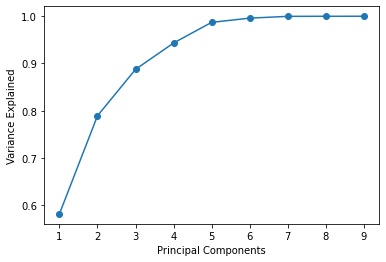

In [98]:
print(pca.explained_variance_ratio_.cumsum())
plt.plot(pca.explained_variance_ratio_.cumsum(), '-o');
plt.xticks(ticks= range(X_train_pca.shape[1]), labels=[i+1 for i in range(X_train_pca.shape[1])])
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.show()

Choose the number of components.

In [99]:
X_train_pca2 = X_train_pca[:, 0:5]
X_val_pca2 = X_val_pca[:, 0:5]
X_test_pca2 = X_test_pca[:, 0:5]

**Linear Regression with PCA transformed data**

In [100]:
lin_reg_2 = LinearRegression()

lin_reg_2.fit(X_train_pca2, y_train)

LinearRegression()

In [101]:
lin_pred_train = lin_reg_2.predict(X_test_pca2)

In [102]:
lin_pred_val = lin_reg_2.predict(X_val_pca2)

In [103]:
lin_train_pca = r2_score(y_test, lin_pred_train)

print("The R2 score for the training data is: ", lin_train_pca)

The R2 score for the training data is:  0.4893512558293136


In [104]:
lin_val_pca = r2_score(y_val, lin_pred_val)

print("The R2 score for the validation data is: ", lin_val_pca)

The R2 score for the validation data is:  0.6333206399655548


In [105]:
lin_train_RMSE = mean_squared_error(y_test, lin_pred_train, squared=False)

print("The RMSE on the training data is: ", lin_train_RMSE)

The RMSE on the training data is:  1.6677342172626306


In [106]:
lin_val_RMSE = mean_squared_error(y_val, lin_pred_val, squared=False)

print("The RMSE on the validation data is: ", lin_val_RMSE)

The RMSE on the validation data is:  1.4138222446020623


**RF Regression with PCA transformed data**

In [107]:
rf_pca = RandomForestRegressor(n_estimators=100, random_state=RANDOM_STATE)

rf_pca.fit(X_train_pca2, y_train)

RandomForestRegressor(random_state=0)

In [108]:
rf_pca_pred_train = rf_pca.predict(X_test_pca2)

In [109]:
rf_pca_pred_val = rf_pca.predict(X_val_pca2)

In [110]:
rf_pca_train = r2_score(y_test, rf_pca_pred_train)

print("The R2 score for the training data is: ", rf_pca_train)

The R2 score for the training data is:  0.5683219617573205


In [111]:
rf_pca_val = r2_score(y_val, rf_pca_pred_val)

print("The R2 score for the validation data is: ", rf_pca_val)

The R2 score for the validation data is:  0.737248871804719


In [112]:
rf_pca_train_RMSE = mean_squared_error(y_test, rf_pca_pred_train, squared=False)

print("The RMSE on the training data is: ", rf_pca_train_RMSE)

The RMSE on the training data is:  1.533365481753273


In [113]:
rf_pca_val_RMSE = mean_squared_error(y_val, rf_pca_pred_val, squared=False)

print("The RMSE on the validation data is: ", rf_pca_val_RMSE)

The RMSE on the validation data is:  1.196806316940256


**SVM Regression with PCA transformed data**

In [114]:
#svm_pca = SVR(kernel='linear')

svm_pca = SVR()

svm_pca.fit(X_train_pca2, y_train)

SVR()

In [115]:
svm_pca_pred_train = svm_pca.predict(X_test_pca2)

In [116]:
svm_pca_pred_val = svm_pca.predict(X_val_pca2)

In [117]:
svm_pca_train = r2_score(y_test, svm_pca_pred_train)

print("The R2 score for the training data is: ", svm_pca_train)

The R2 score for the training data is:  0.5891981354938564


In [118]:
svm_pca_val = r2_score(y_val, svm_pca_pred_val)

print("The R2 score for the validation data is: ", svm_pca_val)

The R2 score for the validation data is:  0.7469051026270985


In [119]:
svm_pca_train_RMSE = mean_squared_error(y_test, svm_pca_pred_train, squared=False)

print("The RMSE on the training data is: ", svm_pca_train_RMSE)

The RMSE on the training data is:  1.4958288607007693


In [120]:
svm_pca_val_RMSE = mean_squared_error(y_val, svm_pca_pred_val, squared=False)

print("The RMSE on the validation data is: ", svm_pca_val_RMSE)

The RMSE on the validation data is:  1.1746088611596963


## Q7 [10]

#### Let's do  classification 

We will convert CO target values into binary form by comparing them to a threshold. $ 0 - 3  mg/m^3$ is the range of max 8-hour avg. ambient CO in most US cities. So let's take that.  
[CO Levels of Concern in Government Recommendations and Regulations](https://www.carbonmonoxidekills.com/are-you-at-risk/carbon-monoxide-levels/)

In [121]:
from sklearn.preprocessing import Binarizer

In [122]:
binarizer = Binarizer(threshold=3)

In [123]:
y_train_cat = binarizer.transform(y_train.values.reshape(-1,1)).ravel()
y_val_cat = binarizer.transform(y_val.values.reshape(-1,1)).ravel()
y_test_cat = binarizer.transform(y_test.values.reshape(-1,1)).ravel()

In [124]:
y_train_cat = pd.Series(y_train_cat)

<AxesSubplot:>

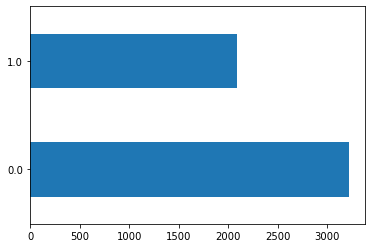

In [125]:
y_train_cat.value_counts().plot.barh()

### Fit RBF Kernel SVM Classifier

#### 1. Standardized training data 
- Using the standardized training data perform grid search:
    - Find the best combination of the `C` and `gamma` hyper-parameters.  
- For the best model:
    - Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the validation set:
     - Create confusion matrix
     - Recall (Sensitivity)
     - Specificity
     - Precision
     - Balanced Accuracy
     - F1 Score
     

#### 2. PCA transformed training data 
- Using the **pca** transformed training data `X_train_pca2` perform grid search:
    - Find the best combination of the `C` and `gamma` hyper-parameters.  
- For the best model:
    - Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the validation set `X_val_pca2`:
         - Create confusion matrix
         - Recall (Sensitivity)
         - Specificity
         - Precision
         - Balanced Accuracy
         - F1 Score


In [126]:
from sklearn.svm import SVC

#### SVC Model 1 

In [127]:
svc = SVC()

parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [1, 10, 100, 1000],
    'gamma': [0.001, 0.01, 0.1, 1]
}

svc_model_1_cv = GridSearchCV(svc, parameters, cv=3, n_jobs=-1)
svc_model_1_cv.fit(X_train, y_train_cat.values.ravel())

print_results(svc_model_1_cv)



BEST PARAMS: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

0.915 (+/-0.02) for {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}
0.888 (+/-0.02) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.915 (+/-0.02) for {'C': 1, 'gamma': 0.01, 'kernel': 'linear'}
0.913 (+/-0.02) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.915 (+/-0.02) for {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
0.918 (+/-0.01) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.915 (+/-0.02) for {'C': 1, 'gamma': 1, 'kernel': 'linear'}
0.923 (+/-0.02) for {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.914 (+/-0.02) for {'C': 10, 'gamma': 0.001, 'kernel': 'linear'}
0.912 (+/-0.02) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.914 (+/-0.02) for {'C': 10, 'gamma': 0.01, 'kernel': 'linear'}
0.916 (+/-0.02) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.914 (+/-0.02) for {'C': 10, 'gamma': 0.1, 'kernel': 'linear'}
0.921 (+/-0.02) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.914 (+/-0.02) for {'C': 10, 'gamma': 1, 'kernel': 'linear'}
0.917 (

In [128]:
svc_model_1_cv.best_estimator_

SVC(C=100, gamma=0.1)

In [129]:

svc_m1_pred_val = svc_model_1_cv.best_estimator_.predict(X_val)

print(svc_m1_pred_val)

print("\n")

print("y_val = ",y_val_cat)



[1. 0. 0. ... 0. 0. 1.]


y_val =  [1. 0. 0. ... 0. 0. 1.]


In [130]:
from sklearn.metrics import classification_report, confusion_matrix

In [131]:
print(metrics.classification_report(y_val_cat, svc_m1_pred_val))

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93       812
         1.0       0.90      0.89      0.90       517

    accuracy                           0.92      1329
   macro avg       0.92      0.91      0.92      1329
weighted avg       0.92      0.92      0.92      1329



#### SVC Model 2

In [132]:
svc = SVC()

parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [1, 10, 100, 1000],
    'gamma': [0.001, 0.01, 0.1, 1]
}

svc_model_2_cv = GridSearchCV(svc, parameters, cv=3, n_jobs=-1)
svc_model_2_cv.fit(X_train_pca2, y_train_cat.values.ravel())

print_results(svc_model_2_cv)



BEST PARAMS: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}

0.901 (+/-0.01) for {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}
0.886 (+/-0.01) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.901 (+/-0.01) for {'C': 1, 'gamma': 0.01, 'kernel': 'linear'}
0.905 (+/-0.02) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.901 (+/-0.01) for {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
0.915 (+/-0.02) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.901 (+/-0.01) for {'C': 1, 'gamma': 1, 'kernel': 'linear'}
0.920 (+/-0.02) for {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.900 (+/-0.02) for {'C': 10, 'gamma': 0.001, 'kernel': 'linear'}
0.899 (+/-0.02) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.900 (+/-0.02) for {'C': 10, 'gamma': 0.01, 'kernel': 'linear'}
0.911 (+/-0.02) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.900 (+/-0.02) for {'C': 10, 'gamma': 0.1, 'kernel': 'linear'}
0.915 (+/-0.02) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.900 (+/-0.02) for {'C': 10, 'gamma': 1, 'kernel': 'linear'}
0.913 (+/-0

In [133]:
svc_model_2_cv.best_estimator_

SVC(C=1, gamma=1)

In [134]:
svc_m2_pred_val = svc_model_2_cv.best_estimator_.predict(X_val_pca2)

print(svc_m2_pred_val)

print("\n")

print("y_val = ",y_val_cat)


[1. 0. 0. ... 0. 0. 1.]


y_val =  [1. 0. 0. ... 0. 0. 1.]


In [135]:
print(metrics.classification_report(y_val_cat, svc_m2_pred_val))

              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93       812
         1.0       0.90      0.86      0.88       517

    accuracy                           0.91      1329
   macro avg       0.91      0.90      0.91      1329
weighted avg       0.91      0.91      0.91      1329



## Q8 [10]

- For regression:
    - Think of other ways of improving the regression performance and list at least two possibilities.
    - You can use any of the datasets we have been using (standardized data, PCA transformed data), or re-create your own set from the original.
    - Implement both of the methods you proposed. 
    - Is the validation performance increasing? For performance comparison you can use any regression performance metric that you deem to be appropriate. 
    - Optional: Apply different methods, ideas as you see fit and see if the validation performance is improving.

For this problem, I will consider using additional regression techniques. 

In [136]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)


Ridge()

In [137]:
ridge_pred_train = ridge_reg.predict(X_test)

In [139]:
ridge_pred_val = ridge_reg.predict(X_val)

In [140]:
ridge_train_R2 = r2_score(y_test, ridge_pred_train)

print("The R2 score for the training data is: ", ridge_train_R2)

The R2 score for the training data is:  0.4934244299046583


In [141]:
ridge_val_R2 = r2_score(y_val, ridge_pred_val)

print("The R2 score for the validation data is: ", ridge_val_R2)

The R2 score for the validation data is:  0.6464617895027771


In [142]:
ridge_train_RMSE = mean_squared_error(y_test, ridge_pred_train, squared=False)

print("The RMSE on the training data is: ", ridge_train_RMSE)

The RMSE on the training data is:  1.6610695851311714


In [143]:
ridge_val_RMSE = mean_squared_error(y_val, ridge_pred_val, squared=False)

print("The RMSE on the validation data is: ", ridge_val_RMSE)

The RMSE on the validation data is:  1.3882566347631466


In [144]:
from sklearn.linear_model import ElasticNet
e_net = ElasticNet(random_state=0)
e_net.fit(X_train, y_train)

ElasticNet(random_state=0)

In [145]:
e_net_pred_train = e_net.predict(X_test)

In [146]:
e_net_pred_val = e_net.predict(X_val)

In [147]:
e_net_train_R2 = r2_score(y_test, e_net_pred_train)

print("The R2 score for the training data is: ", e_net_train_R2)

The R2 score for the training data is:  0.3318472288175136


In [148]:
e_net_val_R2 = r2_score(y_val, e_net_pred_val)

print("The R2 score for the validation data is: ", e_net_val_R2)

The R2 score for the validation data is:  0.3993519388910556


In [149]:
e_net_train_RMSE = mean_squared_error(y_test, e_net_pred_train, squared=False)

print("The RMSE on the training data is: ", e_net_train_RMSE)

The RMSE on the training data is:  1.9076715032223284


In [150]:
e_net_val_RMSE = mean_squared_error(y_val, e_net_pred_val, squared=False)

print("The RMSE on the validation data is: ", e_net_val_RMSE)

The RMSE on the validation data is:  1.8095126262083623


## Q9 [10]

- For classification:
    - Try at least one classifier other than SVM (RF, GBM, Logistic Regression, etc). 
    - Think of other ways of improving the regression performance and list at least two possibilities.
    - You can use any of the datasets we have been using (standardized data, PCA transformed data), or re-create your own set from the original.
    - Implement both of the methods you proposed. 
    - Is the validation performance increasing? For performance comparison you can use any regression performance metric that you deem to be appropriate. 
    - Optional: Apply different methods, ideas as you see fit and see if the validation performance is improving.

In [173]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [174]:
n_bayes = GaussianNB()
n_bayes.fit(X_train, y_train_cat)

GaussianNB()

In [190]:
nb_predict_train = n_bayes.predict(X_test)

In [191]:
nb_predict_val = n_bayes.predict(X_val)

In [192]:
train_score = accuracy_score(y_test_cat,nb_predict_train,normalize=False)

train_score

634

In [194]:
val_score = accuracy_score(y_val_cat,nb_predict_val,normalize=False)

In [195]:
print("Total number of correctly classified observations:", train_score, "out of", len(y_test_cat),"observations, Accuracy of the predictions:", score/float(len(y_test_cat))," ") 
 

Total number of correctly classified observations: 634 out of 739 observations, Accuracy of the predictions: 0.857916102841678  


In [196]:
print("Total number of correctly classified observations:", val_score, "out of", len(y_val_cat),"observations, Accuracy of the predictions:", val_score/float(len(y_val_cat))," ") 
 

Total number of correctly classified observations: 1089 out of 1329 observations, Accuracy of the predictions: 0.8194130925507901  


In [200]:
print(metrics.classification_report(y_test_cat, nb_predict_train))

              precision    recall  f1-score   support

         0.0       0.93      0.84      0.88       467
         1.0       0.76      0.89      0.82       272

    accuracy                           0.86       739
   macro avg       0.85      0.86      0.85       739
weighted avg       0.87      0.86      0.86       739



In [198]:
print(metrics.classification_report(y_val_cat, nb_predict_val))

              precision    recall  f1-score   support

         0.0       0.90      0.79      0.84       812
         1.0       0.72      0.87      0.79       517

    accuracy                           0.82      1329
   macro avg       0.81      0.83      0.82      1329
weighted avg       0.83      0.82      0.82      1329



In this case, Naive-Bayes was the chosen classifier.  Unfortunately, it seems that this classification method offered no improvement.

## Q10 [10]

- Choose the best 2 regressors among the trained regressions models:
- Create a table summarizing results on the **test** set for regression (with target variables in `y_test`):
    - Show the R^2 and RMSE performance metrics on test data for each model.
- Which model is best for regression? Is this in line with your analysis (the validation performance of the models) or is this not expected?



- Choose the best 2 classifiers among the trained classification models:
- Create a table summarizing results on the **test** set for classification (with target variables in `y_test_cat`):
    - Show the classification performance metrics (accuracy, recall, precision, f1-score, etc.) on test data for each model. 
- Which model is best for classification? Is this in line with your analysis (the validation performance of the models) or is this not expected? 



> Note that the same transformation used during training should be applied on the testing set. (If you applied PCA on training data for the selected model, you need to apply PCA on the testing set as well.) 



In [208]:
poly_svm = SVR(kernel='poly')
poly_svm

SVR(kernel='poly')

In [232]:
poly_svm.fit(X_test, y_test)

SVR(kernel='poly')

In [233]:
poly_svm_predict = poly_svm.predict(X_test)

In [234]:
print("The R2 score of the model using the test data is: ", r2_score(y_test, poly_svm_predict))

The R2 score of the model using the test data is:  0.5295021262340797


In [240]:
poly_svm_RMSE = mean_squared_error(y_test, poly_svm_predict, squared=False)

print("The RMSE on the test data is: ", poly_svm_RMSE)

The RMSE on the test data is:  1.6008275057772252


In [235]:
rbf_svm = SVR(kernel='rbf')
rbf_svm

SVR()

In [236]:
rbf_svm.fit(X_test, y_test)

SVR()

In [238]:
rbf_svm_predict = poly_svm.predict(X_test)

In [239]:
print("The R2 score of the model using the test data is: ", r2_score(y_test, rbf_svm_predict))

The R2 score of the model using the test data is:  0.5295021262340797


In [241]:
rbf_svm_RMSE = mean_squared_error(y_test, rbf_svm_predict, squared=False)

print("The RMSE on the test data is: ", rbf_svm_RMSE)

The RMSE on the test data is:  1.6008275057772252


For classification, the best options appeared to be the SVC models, with standardized data and with PCA data.  They are as follows:

In [243]:
svc = SVC()

parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [1, 10, 100, 1000],
    'gamma': [0.001, 0.01, 0.1, 1]
}

svc_model_1_cv = GridSearchCV(svc, parameters, cv=3, n_jobs=-1)
svc_model_1_cv.fit(X_train, y_train_cat.values.ravel())

svc_m1_pred_val = svc_model_1_cv.best_estimator_.predict(X_test)

print(metrics.classification_report(y_test_cat, svc_m1_pred_val))

              precision    recall  f1-score   support

         0.0       0.94      0.93      0.93       467
         1.0       0.89      0.89      0.89       272

    accuracy                           0.92       739
   macro avg       0.91      0.91      0.91       739
weighted avg       0.92      0.92      0.92       739



In [244]:
svc = SVC()

parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [1, 10, 100, 1000],
    'gamma': [0.001, 0.01, 0.1, 1]
}

svc_model_2_cv = GridSearchCV(svc, parameters, cv=3, n_jobs=-1)
svc_model_2_cv.fit(X_train_pca2, y_train_cat.values.ravel())

svc_m2_pred_val = svc_model_2_cv.best_estimator_.predict(X_test_pca2)

print(metrics.classification_report(y_test_cat, svc_m2_pred_val))


              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93       467
         1.0       0.89      0.89      0.89       272

    accuracy                           0.92       739
   macro avg       0.91      0.91      0.91       739
weighted avg       0.92      0.92      0.92       739



- What did you learn in this project? Any suggestions?

For this project, I learned about the sklearn's Binarizer.  I see how this tool can be very useful regarding classification.  I also discovered that many models must be created and then attempt to find the model that has the best fit with the data.

I'll have to study up on the scores and their meanings in addition to experimenting more with the various regression and classification techniques.

For a couple of the questions, such as #10, there was a bit of confusion as to what is expected.  The initial code snippets are very much welcomed, but on occassion it would be nice to know if the produced output is in the area of being maybe close to correct  :)

# Thank you
Ilyas Ustun  
twitter: \_ilyas\_ustun\_